# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading Data

In [ ]:
data = pd.read_csv('data\Indian_Kids_Screen_Time.csv')
data.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [3]:
data.shape

(9712, 8)

In [4]:
# Count missing values in each column of the dataset
missing_values_count = data.isnull().sum()

# Print the missing values count for inspection
print(missing_values_count) 

# health impacts = NaN suggests that there is no impact on health due to screen time


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [5]:
# data is consistent

# Display the unique values present in the "Gender" column
data["Gender"].unique()

# Display the unique values present in the "Urban_or_Rural" column
data["Urban_or_Rural"].unique()


array(['Urban', 'Rural'], dtype=object)

In [6]:
data.dtypes

Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


# Statistical Description

In [8]:
data.describe()

,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [9]:
# Replacing NaN in Health_Impacts with 'None', meaning no Health Impacts due to screen time
data['Health_Impacts'] = data['Health_Impacts'].fillna('None')

# Print the frequency of each category in the 'Health_Impacts' column
# (to verify that NaN values are successfully replaced with 'None')
print(data['Health_Impacts'].value_counts())


Health_Impacts
None                                             3218
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64


# Data Visuals

In [10]:
# Define a consistent color palette for all plots
palette = sns.color_palette('pastel')


## Gender Distribution (Pie Chart)
- Dataset is balanced across genders, ensuring unbiased analysis.
- Slightly higher proportion of one gender may influence comparisons.
- Provides a strong foundation for gender-based screen time insights.

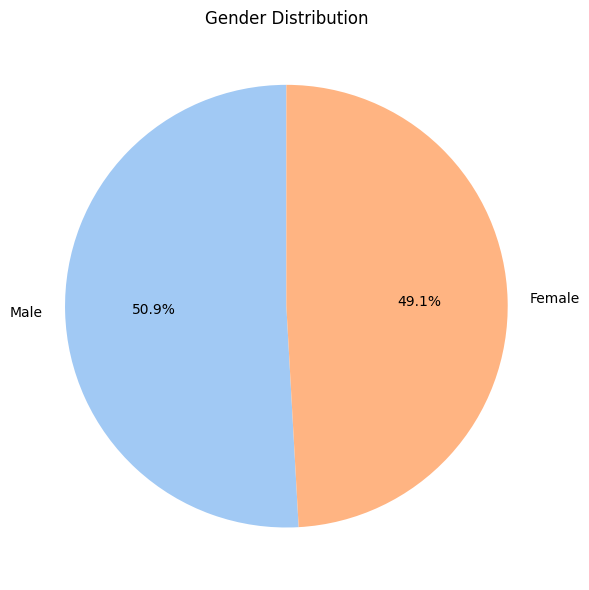

In [11]:
# Count the occurrences of each category in the 'Gender' column
counts = data['Gender'].value_counts()

# Create a pie chart to visualize gender distribution
plt.figure(figsize=(6, 6))  # square figure for better symmetry
plt.pie(
    counts,                                # values for each category
    labels=counts.index,                   # labels (Male, Female, etc.)
    autopct='%1.1f%%',                     # show percentages with 1 decimal
    startangle=90,                         # start at 90 degrees for better readability
    colors=palette                         # use the consistent pastel palette
)

# Add a title
plt.title('Gender Distribution')
plt.axis('equal')      # draw as circle
plt.tight_layout()
plt.show()


## Urban–Rural Distribution (Pie Chart)

- Majority of kids belong to **urban areas**, highlighting wider device access.
- Rural kids represent a smaller share, reflecting digital divide.
- Urban concentration suggests screen time may be higher in cities.

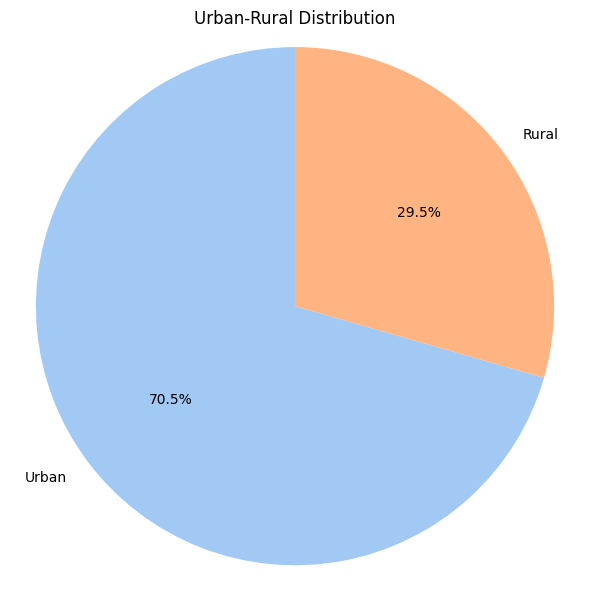

In [12]:
# Count the occurrences of each category in the 'Urban_or_Rural' column
counts = data['Urban_or_Rural'].value_counts()

# Create a pie chart to visualize urban vs rural distribution
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=palette  # apply consistent pastel palette
)

# Add a title
plt.title('Urban-Rural Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


## Screen Time Distribution by Age (Boxplot)

- Screen time **increases with age**, especially in teenage groups.
- Younger kids maintain more consistent patterns, while older kids show variability.
- Several outliers suggest heavy overuse in certain individuals.

C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\3183402077.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\3183402077.py:3: UserWarning: 
The palette list has fewer values (10) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


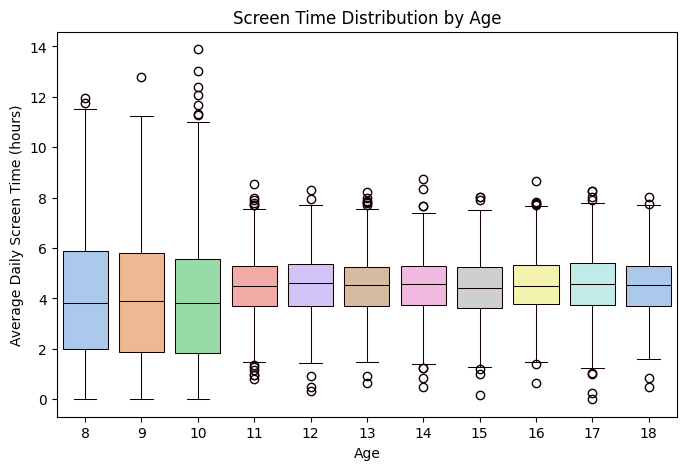

In [13]:
# Create a boxplot to visualize screen time distribution across ages
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    x='Age',
    y='Avg_Daily_Screen_Time_hr',
    color=".9",
    linecolor="#100",
    linewidth=.75,
    palette=palette   # consistent pastel palette
)

# Add title and labels
plt.title('Screen Time Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()


## Screen Time Distribution by Gender (Boxplot)

- Medians are similar across genders, showing no strong bias.
- Boys display slightly higher spread and extreme values.
- Both genders experience significant screen exposure.

C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\3383629654.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(


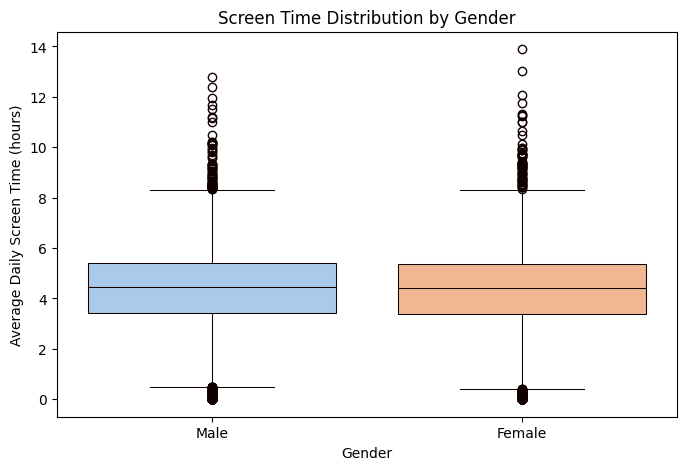

In [14]:
# Create a boxplot to compare screen time across genders
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    x='Gender',
    y='Avg_Daily_Screen_Time_hr',
    linecolor="#100",
    linewidth=.75,
    hue='Gender',
    palette=palette  
)
plt.title('Screen Time Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()


## Screen Time by Urban/Rural & Gender (Boxplot)

- Urban kids of both genders show **higher screen times** than rural kids.
- Rural kids maintain comparatively moderate screen usage.
- Gender differences remain minor compared to the urban–rural divide.

C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\4259380359.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(


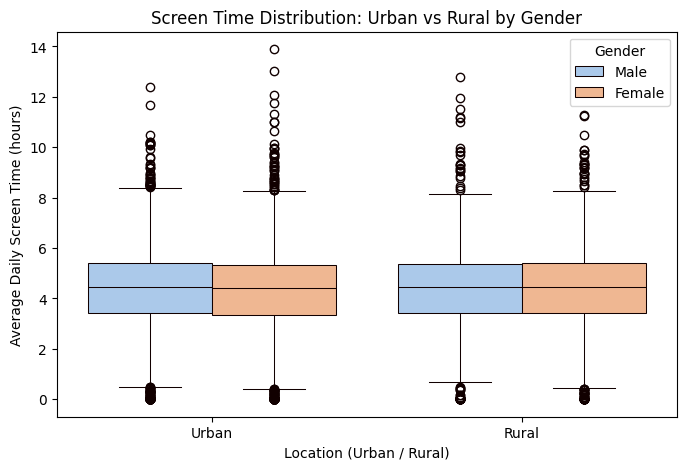

In [15]:
# Boxplot to compare average daily screen time between Urban and Rural participants,
# further divided by Gender (hue)
plt.figure(figsize=(8, 5)) 

sns.boxplot(
    data=data,
    x='Urban_or_Rural',               
    y='Avg_Daily_Screen_Time_hr',     
    linecolor="#100",                 
    linewidth=.75,                   
    hue='Gender',                     
    palette=palette                 
)
plt.title('Screen Time Distribution: Urban vs Rural by Gender')
plt.xlabel('Location (Urban / Rural)')
plt.ylabel('Average Daily Screen Time (hours)')
plt.show()


## Screen Time by Device & Gender (Boxplot)

- **Smartphones** dominate as the primary device across both genders.
- Tablets and laptops show moderate screen usage levels.
- Boys and girls use devices similarly, with subtle differences in spread.

C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\2880456797.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(


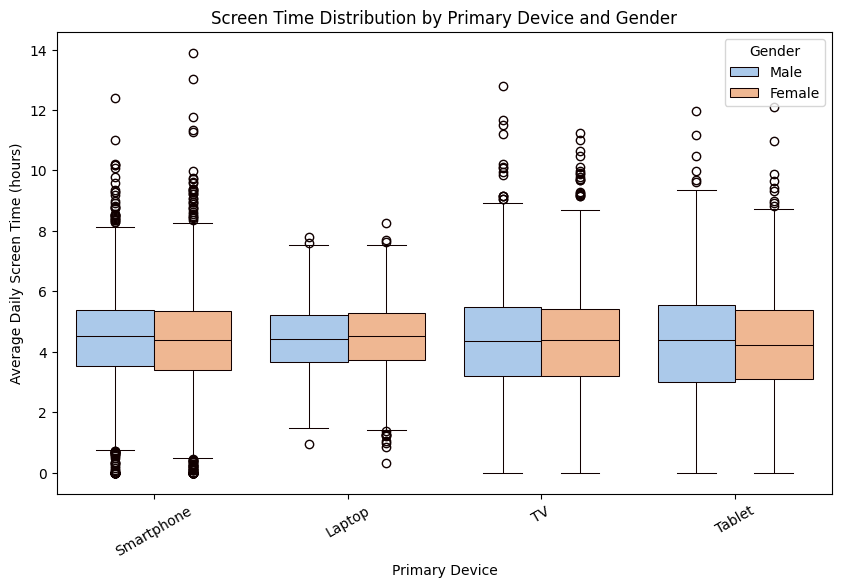

In [16]:
# Boxplot to compare average daily screen time across different primary devices,
# further divided by Gender (hue)
plt.figure(figsize=(10, 6))  

sns.boxplot(
    data=data,
    x='Primary_Device',               
    y='Avg_Daily_Screen_Time_hr',     
    linecolor="#100",                 
    linewidth=.75,                    
    hue='Gender',                     
    palette=palette                  
)

plt.title('Screen Time Distribution by Primary Device and Gender')
plt.xlabel('Primary Device')
plt.ylabel('Average Daily Screen Time (hours)')
plt.xticks(rotation=30)
plt.show()


## Average Screen Time by Age & Gender (Bar Plot)

- Screen time gradually **rises with age**, peaking in older teens.
- Boys and girls follow similar patterns, with minor differences in averages.
- Confirms increasing dependency on screens as kids grow older.

C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\3501905508.py:5: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(


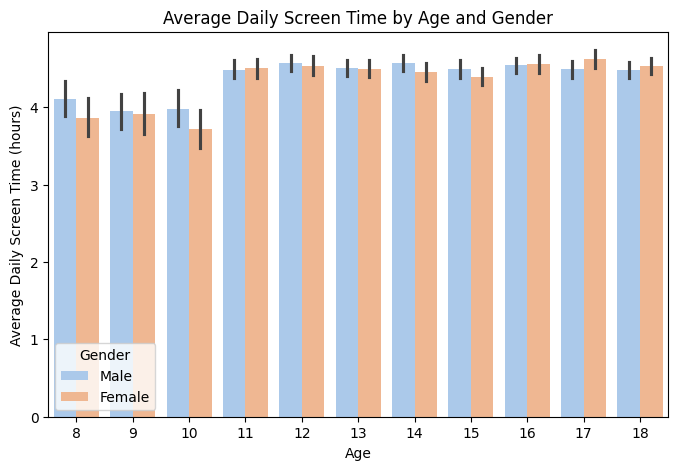

In [17]:
# Barplot to show the average daily screen time across different ages,
# further divided by Gender (hue)
plt.figure(figsize=(8, 5))  # set figure size for clarity

sns.barplot(
    data=data,
    x='Age',                          # categorical axis (age groups or exact ages)
    y='Avg_Daily_Screen_Time_hr',     # numerical axis (average screen time in hours)
    hue='Gender',                     # separate bars for each gender
    palette=palette                   # consistent pastel palette
)

# Add a descriptive title
plt.title('Average Daily Screen Time by Age and Gender')

# Label axes
plt.xlabel('Age')
plt.ylabel('Average Daily Screen Time (hours)')

# Display the plot
plt.show()


## Exceeding Recommended Screen Time Limit (Pie Chart)

- A large share of kids **exceed recommended daily limits**.
- Highlights growing concern about overexposure to screens.
- Indicates risk factors for health impacts among the majority.

Exceeded_Recommended_Limit
True     8301
False    1411
Name: count, dtype: int64


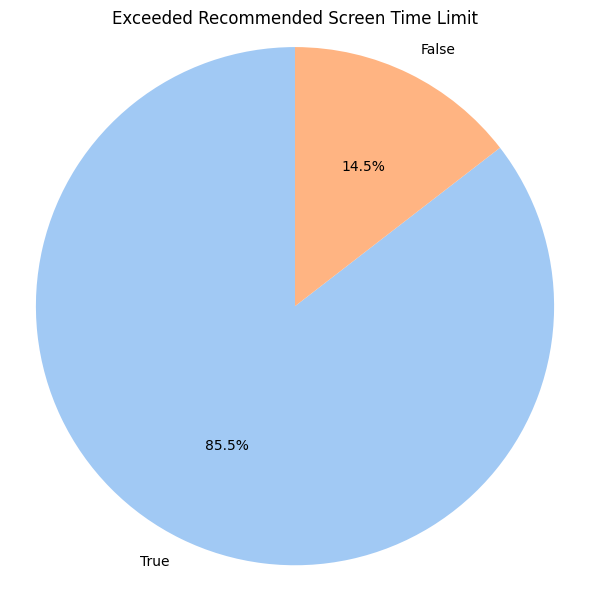

In [18]:
# Count True/False values
limit_counts = data['Exceeded_Recommended_Limit'].value_counts()
print(limit_counts)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    limit_counts,
    labels=limit_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=palette
)
plt.title("Exceeded Recommended Screen Time Limit")
plt.axis('equal')
plt.tight_layout()
plt.show()


## Exceeding Screen Time by Device (Bar Plot)

- **Smartphone users** are most likely to exceed recommended limits.
- Laptops and tablets follow but at a lower scale.
- Suggests smartphones are the key driver of excess screen exposure.


  Primary_Device  Exceeded_Recommended_Limit
0     Smartphone                        3949
1             TV                        2085
2         Laptop                        1275
3         Tablet                         992


C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\1579523841.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


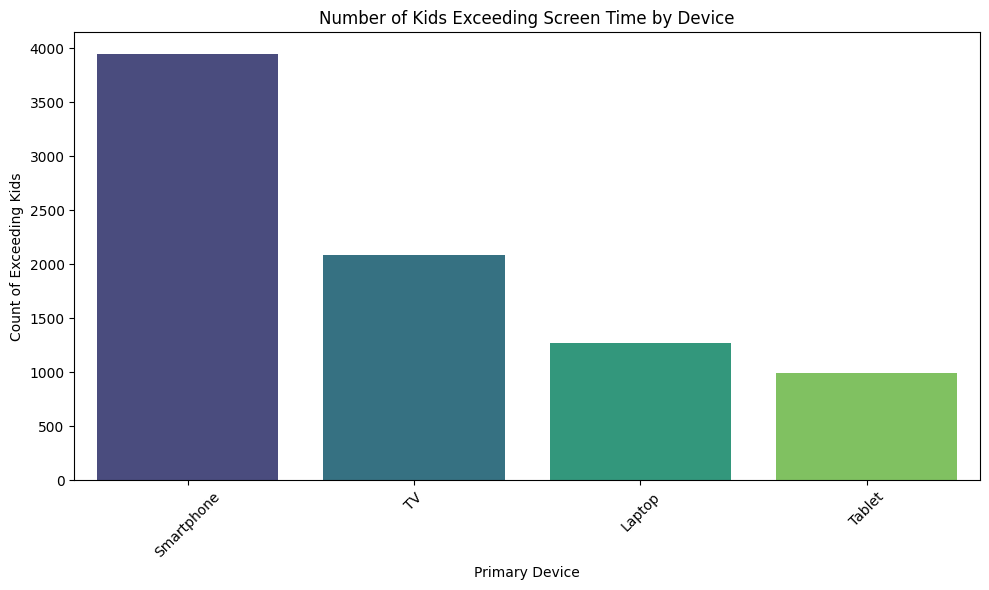

In [19]:
# Group and count
device_limit_counts = data.groupby("Primary_Device")["Exceeded_Recommended_Limit"].sum().sort_values(ascending=False)
device_limit_df = device_limit_counts.reset_index()
print(device_limit_df.head())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=device_limit_df,
    x="Primary_Device",
    y="Exceeded_Recommended_Limit",
    palette="viridis"
)
plt.title("Number of Kids Exceeding Screen Time by Device")
plt.ylabel("Count of Exceeding Kids")
plt.xlabel("Primary Device")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## No Health Impacts by Age Group (Count Plot)

- Younger age groups (8–10, 11–13) report **fewer health impacts**.
- Health impacts become more visible in older teens (14–16, 17–18).
- Suggests cumulative effects of screen time appear with age.

C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\2725064630.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_impact_data["Age_Group"] = pd.cut(no_impact_data["Age"], bins=bins, labels=labels)
C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\2725064630.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=no_impact_data, x="Age_Group", palette="viridis")


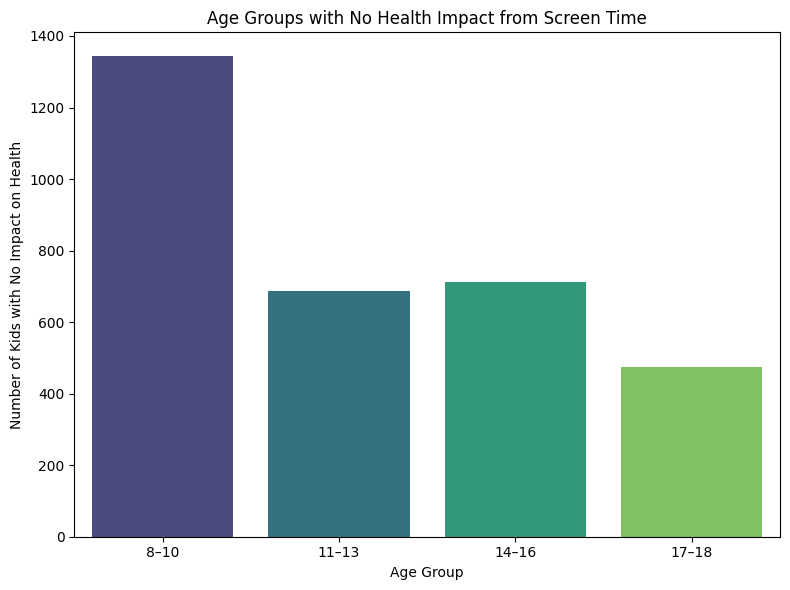

In [20]:
no_impact_data = data[data["Health_Impacts"] == "None"]
bins = [7, 10, 13, 16, 19]  # Covers 8–18
labels = ["8–10", "11–13", "14–16", "17–18"]
no_impact_data["Age_Group"] = pd.cut(no_impact_data["Age"], bins=bins, labels=labels)
plt.figure(figsize=(8, 6))
sns.countplot(data=no_impact_data, x="Age_Group", palette="viridis")
plt.title("Age Groups with No Health Impact from Screen Time")
plt.xlabel("Age Group")
plt.ylabel("Number of Kids with No Impact on Health")
plt.tight_layout()
plt.show()

## Educational vs Recreational Screen Time by Age Group (Bar Plot)

- Younger kids (8–10) spend a **higher proportion of time on educational use** relative to recreation.  
- The ratio declines in teenage groups, indicating **increased recreational screen use**.  
- Highlights a shift from balanced/educational use in early years to **more leisure-oriented use** in older age groups.  


C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\1680695962.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_ratio = data.groupby("Age_Group")["Educational_to_Recreational_Ratio"].mean().reset_index()
C:\Users\dell4\AppData\Local\Temp\ipykernel_16992\1680695962.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_ratio, x="Age_Group", y="Educational_to_Recreational_Ratio", palette="mako")


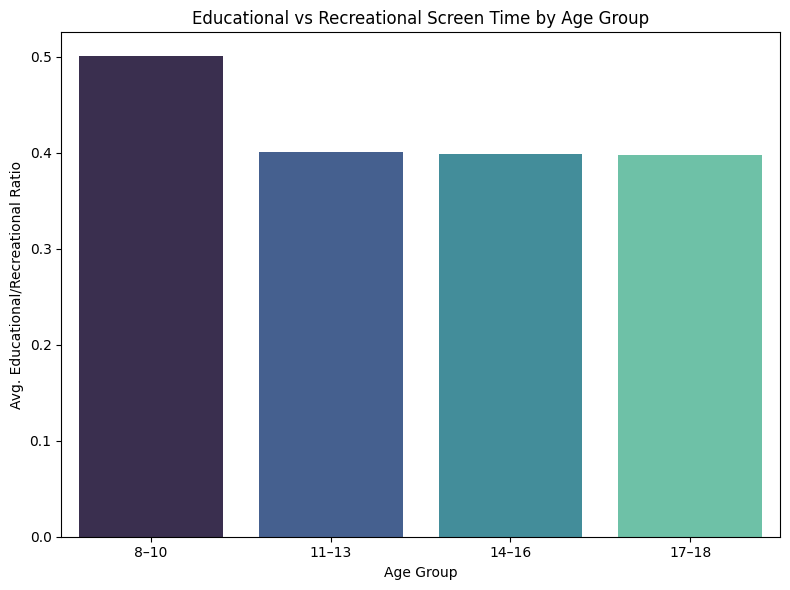

In [21]:
bins = [7, 10, 13, 16, 19]
labels = ["8–10", "11–13", "14–16", "17–18"]
data["Age_Group"] = pd.cut(data["Age"], bins=bins, labels=labels)
grouped_ratio = data.groupby("Age_Group")["Educational_to_Recreational_Ratio"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=grouped_ratio, x="Age_Group", y="Educational_to_Recreational_Ratio", palette="mako")
plt.title("Educational vs Recreational Screen Time by Age Group")
plt.ylabel("Avg. Educational/Recreational Ratio")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()

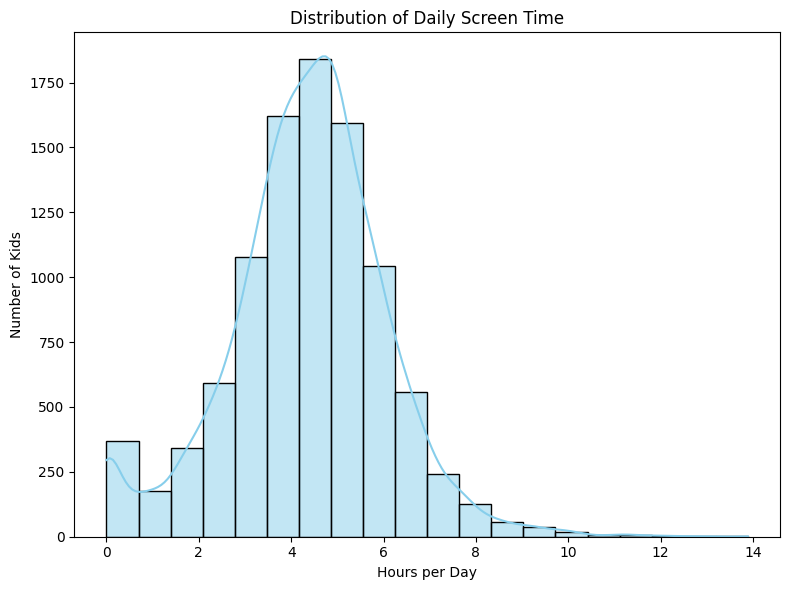

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Avg_Daily_Screen_Time_hr", bins=20, kde=True, color="skyblue")
plt.title("Distribution of Daily Screen Time")
plt.xlabel("Hours per Day")
plt.ylabel("Number of Kids")
plt.tight_layout()
plt.show()